<a href="https://colab.research.google.com/github/rahulshenoys/faceregonition/blob/main/face_recognition_using_keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop, SGD
from keras import backend as K
import keras
import matplotlib.pyplot as plt
import cv2

ImportError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [ ]:
import os
root_path = 'myproject/data'
data_dir =r'/content/drive/MyDrive/myproject'
img_width, img_height = 100, 100
train_data_dir =os.path.join(data_dir, 'data')
validation_data_dir =os.path.join(data_dir, 'data')
nb_train_samples = 25
nb_validation_samples = 10
epochs = 5
batch_size = 16
numclasses = 5

In [ ]:
image = cv2.imread(r'/content/drive/MyDrive/myproject/data/train/rahul/test1_13.jpg')
type(image)

numpy.ndarray

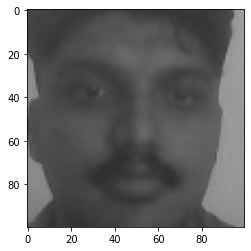

In [ ]:
plt.imshow(image)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,  
    zoom_range = 0.1,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    vertical_flip=False,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 37 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


In [ ]:
%cd

/root


In [ ]:
train_path = r'/content/drive/MyDrive/myproject'
test_path = r'/content/drive/MyDrive/myproject'

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout
from keras.layers import Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential() 
model.add(Conv2D(input_shape=(100,100,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=5, activation="softmax"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 25, 25, 256)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_data = train_datagen.flow_from_directory(train_path,
                                               target_size=[100,100],
                                               batch_size=64,
                                               class_mode='categorical')
test_data = train_datagen.flow_from_directory(test_path,
                                               target_size=[100,100],
                                               batch_size=64,
                                               class_mode='categorical')

Found 37 images belonging to 1 classes.
Found 37 images belonging to 1 classes.


In [ ]:
history=model.fit_generator(train_data,
                           validation_data=test_data,
                           epochs=5,
                           steps_per_epoch=len(train_data),
                           validation_steps=len(test_data))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 8.0472 - accuracy: 0.0000e+00 - val_loss: 10.9896 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 1s 739ms/step - loss: 11.0112 - accuracy: 0.0000e+00 - val_loss: 3349.0718 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 1s 704ms/step - loss: 3394.7183 - accuracy: 0.0000e+00 - val_loss: 768489.3125 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 1s 714ms/step - loss: 754334.6875 - accuracy: 0.0000e+00 - val_loss: 30005224.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 1s 692ms/step - loss: 29851060.0000 - accuracy: 0.0000e+00 - val_loss: 404034528.0000 - val_accuracy: 1.0000


In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO
import cv2
import requests
import os

In [ ]:
%cd

/root


In [ ]:
labels = ['rahul',  'rutu',  'sharnya',  'ramganesh']
test_imgs = ['/content/drive/MyDrive/myproject/data/val/rahul/test1_26.jpg']
for test in test_imgs:
    test_img = os.path.join(validation_data_dir, test)
    img = image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    plt.imshow(img)

NameError: ignored